# Círculo de Mohr para Estado Plano de Tensões

In [89]:
import numpy as np
import pandas as pd
import math as mt
import scipy.linalg as la
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '12'})
rc('text', usetex=True)

In [104]:
def mohr2D(S):
    Sx=S[0][0]
    Sy=S[1][1]
    Sxy=S[0][1]
    
    # tensão média
    Sm = (Sx+Sy)/2
    # Raio-máxima tensão de cisalhamento
    R = np.sqrt(((Sx-Sy)/2)**2 + Sxy**2)
    Tau_max = R
    
    # tensões principais neste ponto de análise
    S1=Sm+R #máxima tensão
    S2=Sm-R # mínima tensão
    
    # direção principal
    theta = mt.atan((2*np.transpose(Sxy))/(Sx-Sy))/2
    theta = theta*180/np.pi
    
    # Visualização do círculo de Mohr
    S_x = np.linspace(S2,S1,1000)
    # (S_x - S_m)^2 + S_xy^2 = R^2
    S_xy = np.sqrt(R**2-(S_x-Sm)**2);  # Equação da circunferência
    
    plt.plot(S_x,S_xy,color = 'b')
    plt.plot(S_x,-S_xy,color = 'b')
    plt.plot([Sx,Sy],[-Sxy,Sxy],'o--r',linewidth=2, markersize=12)
    plt.title("Círculo de Mohr")
    plt.xlabel(r"$\sigma_x'$" )
    plt.ylabel(r"$\tau_{xy}'$")
    sns.set_style("darkgrid") #darkgrid
    plt.show()
    
    print("A tensão máxima é:",S1)
    print("A tensão máxima é:",S2)
    print("A direção principal tem ângulo de (graus):",theta)
    return np.array([S1,S2,theta]) 
    

In [109]:
S=[[-80,-25],
   [-25,50]]
print(S)

[[-80, -25], [-25, 50]]


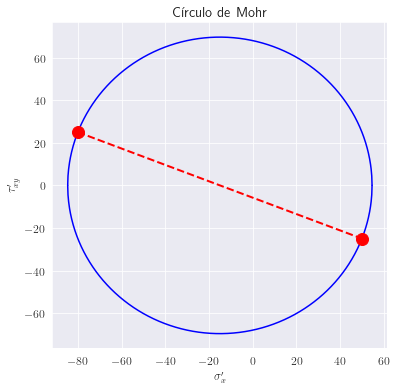

A tensão máxima é: 54.6419413859206
A tensão máxima é: -84.6419413859206
A direção principal tem ângulo de (graus): 10.518755512710909


In [110]:
plt.figure(figsize=(6,6))
Sp=mohr2D(S)

In [111]:
print(Sp)

[ 54.64194139 -84.64194139  10.51875551]
